In [1]:
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
H_list = [0,0.5,1]
SEED = 42
N = 1000
E=2

In [3]:
df = pd.DataFrame()
df['H'] = H_list
df['seed'] = [SEED]*len(H_list)
df['N'] = [N]*len(H_list)
df['E'] = [E]*len(H_list)
df

,H,seed,N,E
0,0.0,42,1000,2
1,0.5,42,1000,2
2,1.0,42,1000,2


c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


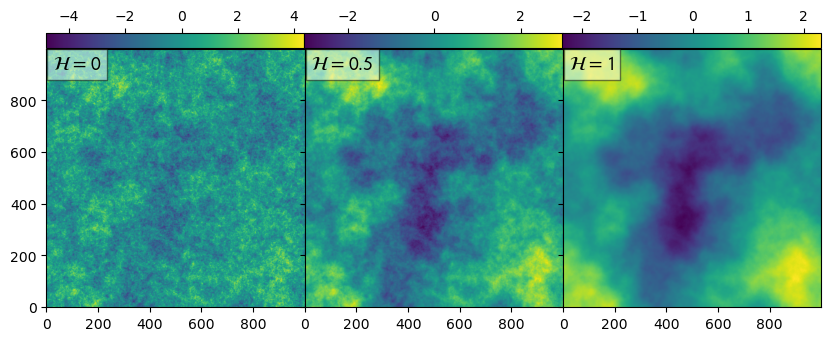

,H,seed,N,E
0,0.0,42,1000,2
1,0.5,42,1000,2
2,1.0,42,1000,2


In [36]:
props = dict(facecolor='white', alpha=0.5)

f,ax = plt.subplots(1,3, figsize = (10,5), sharex=True, sharey=True)

X_list = []
A_list = []
phases = []
rads = []

width = 0.258

position_lists = [
    [0.125, 0.755, width, 0.03],
    [0.125+width, 0.755, 0.259, 0.03],
    [0.125+width*2, 0.755, 0.259, 0.03]
]

for i, H in enumerate(H_list):
    X = ss.fBm(N=N, E=E, H=H, exp=False, centred = False, seed=SEED)
    img = ax[i].imshow(X, origin='lower')
    ax[i].text(0.025, 0.977, fr'$\cal H={H}$', transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    cbaxes = f.add_axes(position_lists[i])
    cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes)
    cbaxes.xaxis.set_ticks_position('top')
    
    #phases.append(phase)
    #rads.append(rad)
    X_list.append(X)
    #A_list.append(A)

f.subplots_adjust(wspace=0, hspace=0)

plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/2DfBm.png', bbox_inches = 'tight')
plt.show()

# df['X'] = X_list
# df['A'] = A_list
# df['phases'] = phases
# df['amplitudes'] = rads
df 

C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_14660\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)


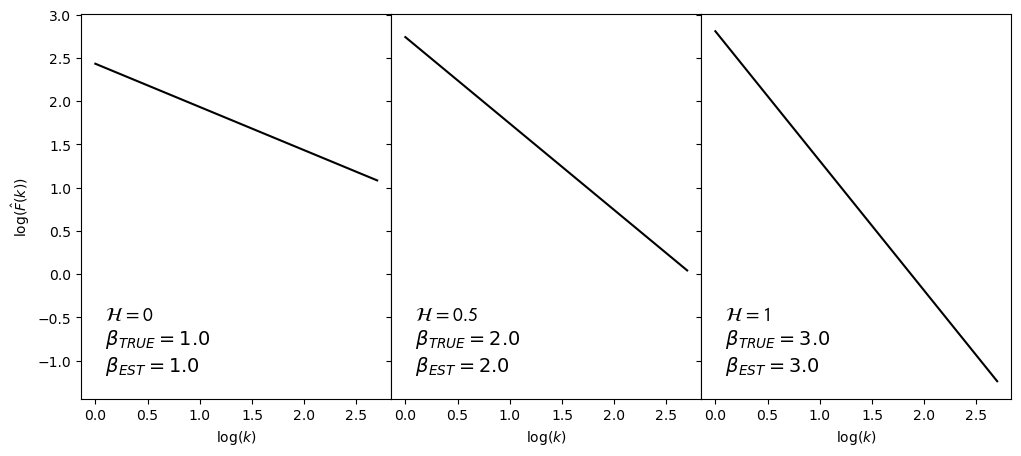

In [17]:
f,ax = plt.subplots(1,3, figsize = (12,5), sharey=True)
k = np.arange(-N/2, N/2)



for i in range(len(X_list)):
    ps = np.fft.fftn(X_list[i])
    
    df = pd.DataFrame()
    df['y'] = np.log10(np.abs(np.fft.fftshift(ps)))
    df['x'] = np.log10(k)
    df=df.replace([np.inf, -np.inf], np.nan).dropna()
    
    beta_est = -2*(df['y'].iloc[-1]-df['y'].iloc[0])/(df['x'].iloc[-1]-df['x'].iloc[0])
    
    text = fr"""
    $\cal H={H_list[i]}$
    $\beta_{{TRUE}} = {E+2*H_list[i]:.1f}$
    $\beta_{{EST}} = {beta_est:.1f}$
    """

    ax[i].plot(df['x'],df['y'], c='k')
    ax[i].text(0.0, 0.3, text, transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top')
    ax[i].set_xlabel(r'$\log(k)$')


ax[0].set_ylabel(r'$\log(\hat{F}(k))$')

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/Power Spectrum measured of 1DfBm.png', bbox_inches = 'tight')
plt.show()

0.00010555574271461328 0.48561328089122224
-8.884600825705743e-06 0.009290661288419181
-7.863363244560625e-06 0.00021167894882045176


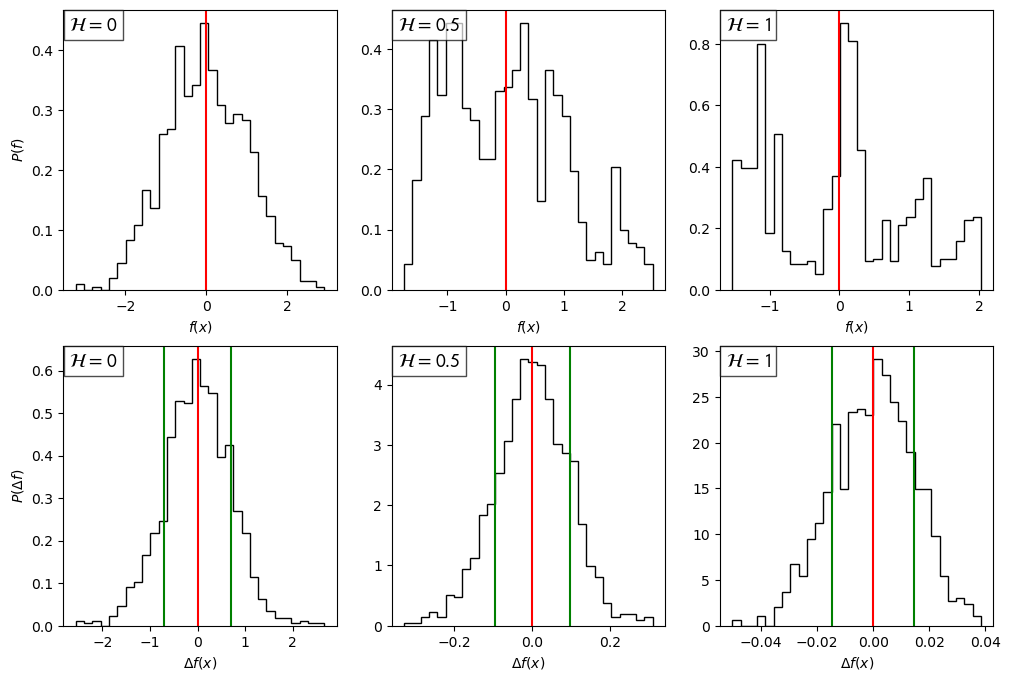

In [18]:
props = dict(facecolor='white', alpha=0.7)
f,ax = plt.subplots(2,3, figsize = (12,8))

for i in range(len(X_list)):
    df = np.diff(X_list[i])

    ax[0,i].hist(X_list[i], bins=30, density=True, histtype='step', color='k')
    ax[1,i].hist(df, bins=30, histtype='step', density=True, color='k')

    ax[0,i].text(0.022, 0.98, fr'$\cal H={H_list[i]}$', transform=ax[0,i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[1,i].text(0.022, 0.98, fr'$\cal H={H_list[i]}$', transform=ax[1,i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[0,i].set_xlabel(r'$f(x)$')
    ax[1,i].set_xlabel(r'$\Delta f(x)$')

    print(np.mean(df),np.var(df))

    ax[0,i].axvline(np.mean(X_list[i]), c='r')
    ax[1,i].axvline(np.mean(df)-np.std(df), c='g')
    ax[1,i].axvline(np.mean(df)+np.std(df), c='g')
    ax[1,i].axvline(np.mean(df), c='r')

ax[0,0].set_ylabel(r'$P(f)$')
ax[1,0].set_ylabel(r'$P(\Delta f)$')

#f.subplots_adjust(wspace=0, hspace=0)
plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/Histograms of 1DfBm.png', bbox_inches = 'tight') 
plt.show()